## Assignment 4

### EP20BTECH11007
### Gowri Govindaraj

## Q1

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy import optimize
import seaborn as sns
sns.set()

In [139]:
data = pd.read_csv('dataa4.dat', sep='\s+', names=['x', 'y','sigma_y'])

In [140]:
X = data['x']
Y = data['y']
sigma_Y = data['sigma_y']


In [141]:
def poly_fitting(param,x):
    return sum(k*x**n for (n,k) in enumerate(param))

def log_likelihood(theta, model= poly_fitting):
    X,Y,sigma_Y = data['x'],data['y'],data['sigma_y']
    Y_fit = model(theta, X)
    return sum(stats.norm.logpdf(*args) for args in zip(Y, Y_fit, sigma_Y))

def theta_fit(deg, model= poly_fitting):
    theta_0 = [0] * (deg + 1)
    neg_logLH = lambda theta: - log_likelihood(theta)
    return optimize.fmin_bfgs(neg_logLH, theta_0, disp=False)


def compute_chi2(deg):
    X,Y,sigma_Y = data['x'],data['y'],data['sigma_y']
    theta = theta_fit(deg)
    val = (Y - poly_fitting(theta, X)) / sigma_Y
    return np.sum(val ** 2)

def dof(deg):
    n = len(data)
    return n - deg - 1

def chi_2_likelihood(deg):
    return stats.chi2(dof(deg)).pdf(compute_chi2(deg))


In [143]:

def log_likelihood(param):
    y_fit = poly_fitting(param, X)
    return sum(stats.norm.logpdf(*args) for args in zip(Y, y_fit, sigma_Y))

def aic(deg, param, data):
    return 2*(deg + 1) - 2*log_likelihood(param)

def bic(deg, param, data):
    n = len(data)
    return (deg + 1)*np.log(n) - 2*log_likelihood(param)

def aicc(deg, param, data):
    n = len(data)
    return aic(deg, param, data) + (2*(deg + 1)*(deg + 2))/(n - deg - 2)

def error(deg, param, data):
    x = data['x']
    y = data['y']
    sigma_y = data['sigma_y']
    y_fit = poly_fitting(param, X)
    return sum(((Y - y_fit)/sigma_Y))

def chi2(deg, param, data):
    chi = error(deg, param, data)
    return np.sum(chi**2)

def dof(deg, param, data):
    n = len(data)
    return n - deg - 1

def chi_2_likelihood(deg, param, data):
    chi_2 = chi2(deg, param, data)
    dof_ = dof(deg, param, data)
    return stats.chi2.logpdf(chi_2, dof_)


In [145]:
linear,h = optimize.curve_fit(poly_fitting(1,X), X, Y, sigma=sigma_Y)
quadratic,h = optimize.curve_fit(poly_fitting(2,X), X, Y, sigma=sigma_Y)
cubic,h = optimize.curve_fit(poly_fitting(3,X), X, Y, sigma=sigma_Y)

error_linear = error(1, linear, data)
error_quadratic = error(2, quadratic, data)
error_cubic = error(3, cubic, data)

p_quadratic = 1-stats.chi2(1).cdf(stats.chi2(len(X)-2).pdf(np.sum(error_linear**2))- stats.chi2(len(X)-3).pdf(np.sum(error_quadratic**2)))
p_cubic = 1-stats.chi2(2).cdf(stats.chi2(len(X)-3).pdf(np.sum(error_linear**2))- stats.chi2(len(X)-4).pdf(np.sum(error_cubic**2)))


In [142]:
print("Chi square value for degree 1 is", chi_2_likelihood(1))
print("Chi square value for degree 2 is", chi_2_likelihood(2))
print("Chi square value for degree 3 is", chi_2_likelihood(3))

Chi square value for degree 1 is 0.045383795585920046
Chi square value for degree 2 is 0.036608447550141865
Chi square value for degree 3 is 0.0421528060101459


The linear model is preferred, as the likelihood is maximum

In [149]:
print("AIC for linear fit is", aic(1, linear, data))
print("AIC for quadratic fit is", aic(2, quadratic, data))
print("AIC for cubic fit is", aic(3, cubic, data))

print("\n\nBIC for linear fit is", bic(1, linear, data))
print("BIC for quadratic fit is", bic(2, quadratic, data))
print("BIC for cubic fit is", bic(3, cubic, data))

print("\n\nAICc for linear fit is", aicc(1, linear, data))
print("AICc for quadratic fit is", aicc(2, quadratic, data))
print("AICc for cubic fit is", aicc(3, cubic, data))

print("\n\np value for quadratic fit is", p_quadratic)
print("p value for cubic fit is", p_cubic)


AIC for linear fit is -40.03668681607268
AIC for quadratic fit is -39.849820624005595
AIC for cubic fit is -38.26081851760259


BIC for linear fit is -38.0452222689647
BIC for quadratic fit is -36.862623803343624
BIC for cubic fit is -34.277889423386625


AICc for linear fit is -39.33080446313151
AICc for quadratic fit is -38.349820624005595
AICc for cubic fit is -35.59415185093592


p value for quadratic fit is 0.9253658781854528
p value for cubic fit is 0.9983858094213665


Minimum values of AIC and BIC $\implies$ Linear model is preferred

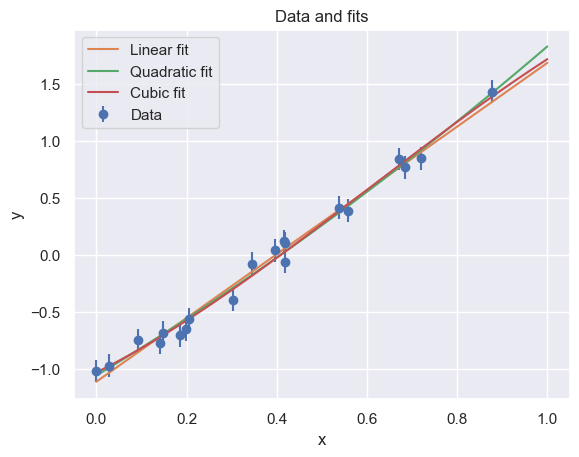

In [ ]:
x = np.linspace(0, 1, 1000)

plt.errorbar(X, Y, yerr=sigma_Y, fmt='o', label='Data')
plt.plot(x, linear_fit(x, *linear), label='Linear fit')
plt.plot(x, quadratic_fit(x, *quadratic), label='Quadratic fit')
plt.plot(x, cubic_fit(x, *cubic), label='Cubic fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data and fits')
plt.show()

## Q2

In [59]:
jdvp = pd.read_csv('/Users/gowrigovindaraj/Documents/Class/Sem 6/DSA/A4/datajvdp.txt',header=None).T
jdvp.columns = ['x','y','sigma_y']

In [60]:
X = jdvp['x']
Y = jdvp['y']
sigma_Y = jdvp['sigma_y']

Here, the least values are observed in the linear model, $\therefore $ linear model is preferred.

## Q3

The paper used here is [The Kolmogorov-Smirnov test for three redshift distributions of
long gamma-ray bursts in the Swift Era](https://iopscience.iop.org/article/10.1088/1674-4527/9/1/008/meta). 

The KS test is applied on 5 bins of 3 Gamma Ray Burst distributions, selected from the a small redshift interval. 
We find that the KS probabilities of one set are huge, suggesting that they arise from the same distribution in these redshift ranges. For another set, the KS probability varies between the different ranges, indicating that the redshift distributions are different, indicating that the two relations are not consistent when calculating the redshift. 
These are useful for considering the verification of laws like 
- the V -Liso relation
- the τ-Liso relation

The one-sample and two-sample KS tests are both used in this study.  Given that the constant is a one-dimensional sample, this does not go against the Penn State University warning.
 
Reference:  
The Kolmogorov–Smirnov test for three redshift distributions of long gamma-ray bursts in the Swift Era (article)
Author: Yun-Ming Dong, and Tan Lu,
Journal: Research in Astronomy and Astrophysics https://iopscience.iop.org/article/10.1088/1674-4527/9/1/008/meta


## Q4

In [62]:
higgs_p_value = [10**-1, 10**-2, 10**-3, 10**-5, 10**-7, 10**-9]
higgs_significance = stats.norm.isf(higgs_p_value)
print("For the Higgs boson discovery claim, \nThe p-values of {} are {}.\nThe significance (in terms of no. of \u03C3s) is {}".format(higgs_p_value, higgs_significance, higgs_significance))

For the Higgs boson discovery claim, 
The p-values of [0.1, 0.01, 0.001, 1e-05, 1e-07, 1e-09] are [1.28155157 2.32634787 3.09023231 4.26489079 5.19933758 5.99780702].
The significance (in terms of no. of σs) is [1.28155157 2.32634787 3.09023231 4.26489079 5.19933758 5.99780702]


In [63]:
ligo_p_value = 2*10**-7
ligo_significance = stats.norm.isf(ligo_p_value)
print("For LIGO, the p-value of {} is {} and \nThe significance(in terms of no. of \u03C3s) is {}".format(ligo_p_value, ligo_significance, ligo_significance))

For LIGO, the p-value of 2e-07 is 5.068957749717791 and 
The significance(in terms of no. of σs) is 5.068957749717791


In [64]:
dof = 67
super_k_chi_2 = 65.2
super_k_p_value = 1 - stats.chi2(dof).cdf(super_k_chi_2)
print("For Super K, the chi square value is {} and the p-value is {}".format(super_k_chi_2, super_k_p_value))

For Super K, the chi square value is 65.2 and the p-value is 0.5394901931099038
